In [1]:
import numpy as np 
import pandas as pd 

In [2]:
medals_df = pd.read_excel(r'C:\Users\Default\Desktop\Data Analytics\project 1(Data Anlysis)\Medals.xlsx')

C:\Users\peeyu\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medals_df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
#all the gold medals countries won
list(medals_df.Gold)

[39,
 38,
 27,
 22,
 20,
 17,
 10,
 10,
 10,
 10,
 7,
 7,
 7,
 7,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
#removing all the zeroes from the data set
medals_df.loc[(medals_df!=0).any(axis=1)]
medals_df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimates of Location 

In [6]:
#mean
medals_df['Total'].mean()

11.612903225806452

In [7]:
#mean of the gold medals
medals_df['Gold'].mean()

3.6559139784946235

In [8]:
#weighted mean 
np.average(medals_df['Total'], weights=medals_df['Gold'])

46.832352941176474

In [9]:
#trimmed mean(upar neeche se kuch highest value remove kr deta hai)
from scipy.stats import trim_mean
trim_mean(medals_df['Total'], 0.1)

6.8933333333333335

In [10]:
#median of the data set 
medals_df['Total'].median()

4.0

In [11]:
#weighted median
def weighted_median(df, val, weight):
    df_sorted = df.sort_values(val)
    cumsum = df_sorted[weight].cumsum()
    cutoff = df_sorted[weight].sum() / 2.
    return df_sorted[cumsum >= cutoff][val].iloc[0]
weighted_median(medals_df, 'Total', 'Gold')

40

In [12]:
#calculating the percentile 
q3 = np.percentile(medals_df['Total'], 75)
q3

11.0

In [13]:
medals_df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimates of variablitity

In [14]:
#variance
from statistics import variance
variance(medals_df['Gold'])

49.315100514259

In [15]:
variance(medals_df['Total'])

364.47896213183736

In [16]:
#standard deviation [std dev = ((sum(xi - u)^2)/N)^1/2]
medals_df['Total'].std()

19.091332120411018

In [17]:
#Mean absolute deviation
from numpy import mean, absolute

In [18]:
mean(absolute(medals_df['Gold']- mean(medals_df['Gold'])))

4.0048560527228565

In [19]:
#Median absolute deviation
from numpy import median, absolute

In [20]:
median(absolute(medals_df['Gold']- median(medals_df['Gold'])))

1.0

In [21]:
import numpy as np
#Interquartile range (for the 'Gold')
q3 ,q1 = np.percentile(medals_df['Gold'], [75,25])
iqr = q3 - q1
iqr

3.0

# Exploring the  Data Distribution

<AxesSubplot:>

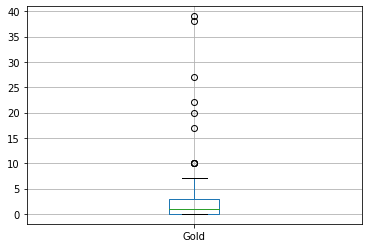

In [22]:
#Box Plots
medals_df.boxplot(column = 'Gold')

In [23]:
#Frequency Table (By making a crosstab)
my_frequency =  pd.crosstab(index=medals_df['Gold'], columns='count')
my_frequency

col_0,count
Gold,
0,28
1,22
2,11
3,11
4,5
6,2
7,4
10,4
17,1


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

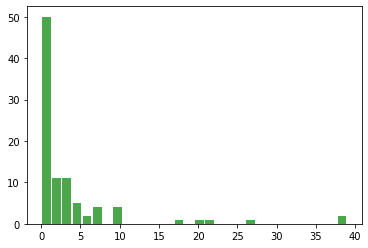

In [24]:
#Histogram 
import matplotlib.pyplot as plt
plt.hist(x=medals_df['Gold'],bins='auto',color='green', alpha=0.7, rwidth=0.85)

# Density Plots and Estimates

<AxesSubplot:ylabel='Density'>

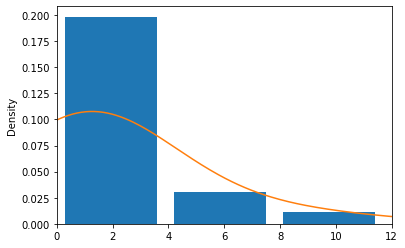

In [25]:
# Density Plot
ax = medals_df['Gold'].plot.hist(density=True, xlim=[0,12], bins=10, rwidth=0.85)
medals_df['Gold'].plot.density(ax=ax)


# Exploring Binary and Categorical Data

In [26]:
#Mode
medals_df['Gold'].mode()


0    0
dtype: int64

Text(0, 0.5, 'Gold Medals Won')

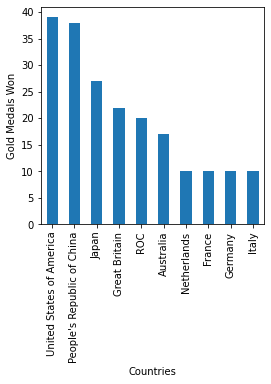

In [27]:
# Bar chart
ax = medals_df.iloc[:10].plot.bar(x ='Team/NOC', y = 'Gold',figsize=(4,4), legend = False)
ax.set_xlabel('Countries')
ax.set_ylabel('Gold Medals Won')

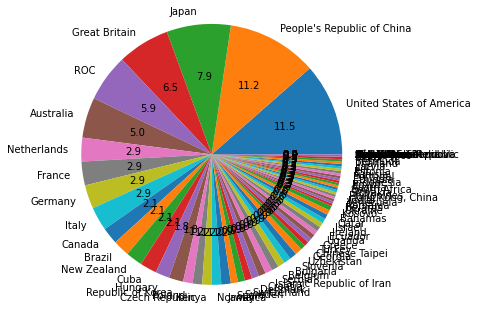

In [28]:
#Pie chart
plt.pie(medals_df['Gold'], labels = medals_df['Team/NOC'], radius=1.5, autopct='%0.1f')
plt.show()

# Correlation 

In [29]:
# Correlaton matrix of the data set 
medals_df.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

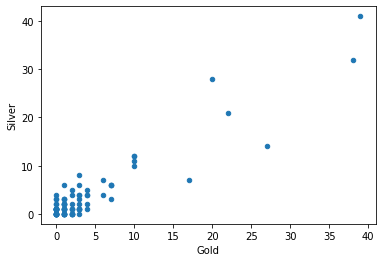

In [30]:
medals_df.plot.scatter(x='Gold', y = 'Silver')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

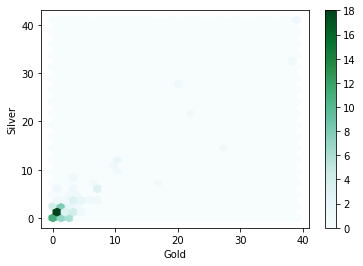

In [31]:
medals_df.plot.hexbin(x='Gold', y='Silver', gridsize=30, sharex=False)

In [32]:
import seaborn as sns

C:\Users\peeyu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

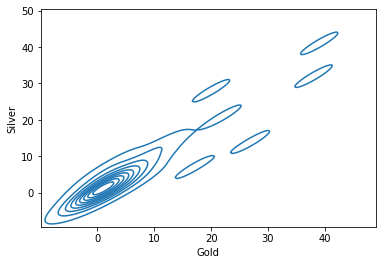

In [33]:
#Contour plot
ax = sns.kdeplot(medals_df["Gold"], medals_df['Silver'])
ax

<AxesSubplot:>

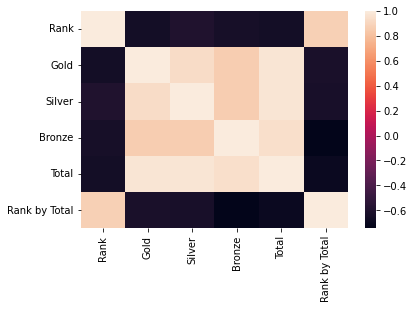

In [34]:
# Heat Map
sns.heatmap(medals_df.corr())

In [35]:
#Table
crosstab = medals_df[["Silver", "Gold"]].pivot_table(index ='Silver', columns="Gold", 
aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0, inplace=True)
crosstab

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

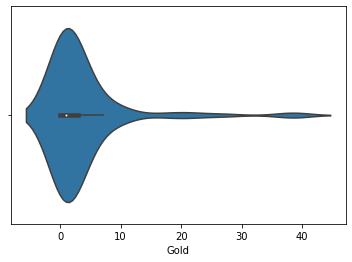

In [36]:
#Violin plot
sns.violinplot(x=medals_df["Gold"])